LPP and DPRE:

Two discrete equations with same behavior and characteristics as KPZ:
- Last Passage Percolation (LPP)
- Directed Polymer in a Random Environment (DPRE)

KPZ is universal meaning many equations have the same behavior and characteristics as KPZ.

Last Passage Percolation Model:
- G[m,n] = max(G[m-1,n], G[m,n-1]) + W[m,n]

Directed Polymer in a Random Environment Model:
- G[m,n] = log(e^G[m-1,n] + e^G[m,n-1]) + W[m,n]

Initial Conditions for G:
- G[0,0] = 0
- if m < 0 or n < 0:
    G[m,n] = -inf

Conditions for W:
- for all m and n:
    W[m,n] = Exp(1) or N(0,1)

In the models above you have a t_start and t_end, meaning you start at a certain time and end at a certain time. You iterate the models through time essentially.

In the visual below, we have implemented Last Passage Percolation with an initial condition at t_start = 0 going to t_end = n, where you get to decide n. You can see the visual below and adjust the speed of the video. The initial condition for the video is setting G[0,0] = 0 and W[m,n] = Exp(1).

In [1]:
#
#don't change
#

%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

def visual(n,speed):

    def nw_initial_sample(n):
        thesample = np.ones(n+3) * (-np.inf)
        thesample[1] = np.random.exponential(1)
        return thesample

    def iter_step(current_sample,r,track):
        a = current_sample[0:r+3]
        b = np.roll(a, 1)
        c = np.stack((b, a),axis=1)
        current_sample[0:r+3] = np.maximum(b,a) + np.random.exponential(1, r+3)
        ind = np.argmax(c,axis=1)
        track[r, 0:r + 3] += ind
        return current_sample, track

    def sample(n, initial_condition,track):
        current_condition = initial_condition
        for i in range(1,n+1):
            #print(i)
            current_condition, track = iter_step(current_condition,i,track)
        #print(current_condition)
        ind = int((n+3)/2)
        num = current_condition[ind]
        return ind, num, num/int(n/2), (num - 4 * int(n/2)) / (int(n/2) ** (1 / 3)), track

    out = sample(n * 2,nw_initial_sample(n * 2),np.zeros((n*2+1, n*2+3)))

    cord = [n, n]
    d = [cord.copy()]
    ind = out[0]
    for r in range(n*2, 0, -1):
        row = out[4][r, :]
        if row[ind] == 1:
            cord[1] -= 1
        else:
            cord[0] -= 1
            ind -= 1
        d.append(cord.copy())

    data = np.array(d)
    x, y = data.T

    di = {}
    path = np.empty(shape=(n*2+1,n*2+1))
    path.fill(-1)

    for i in range(n+1):
        for j in range(n+1):
            cord = [i, j]
            d = [cord.copy()]
            ind = i+1
            for r in range(i+j, 0, -1):
                row = out[4][r, :]
                if row[ind] == 1:
                    cord[1] -= 1
                else:
                    cord[0] -= 1
                    ind -= 1
                d.append(cord.copy())

            if i+j not in di:
                di[i+j] = []
            di[i+j].append(d.copy())

            if i+j != 0:
                if d[-2] == [0,1]:
                    path[i+j][i] = 0
                elif d[-2] == [1,0]:
                    path[i+j][i] = 1

    pathC = []
    for i in range(n*2+1):
        row = path[i, :]
        for r in range(n*2+1):
            if r+1 != n*2+1 and row[r] == 0 and row[r+1] == 1:
                p1 = [r,i-r]
                p2 = [r+1,i-(r+1)]
                cord = [(p1[0]+p2[0])/2,(p1[1]+p2[1])/2]
                pathC.append(cord.copy())

    plt.rc('figure', figsize=(5, 5))

    fig,ax=plt.subplots(1,1)
    
    ax.set_title('Last Passage Percolation Model')

    ax.set_xlim([0,n-1])
    ax.set_ylim([0,n-1])

    tmp = pathC.copy()

    def animate(i):

        for p in di[i]:
            data = np.array(p)
            x, y = data.T
            ax.scatter(x,y,color='red')
            ax.plot(x,y,color='red')
            
        #competition interface code in block below
        '''
        if i != 0:
            data = np.array(tmp[0:i])
            x, y = data.T
            ax.scatter(x,y,color='black')
            ax.plot(x,y,color='black')
        '''

        ax.set_xlim([0,n-1])
        ax.set_ylim([0,n-1])

    return animation.FuncAnimation(fig, animate, np.arange(0, n*2+1, 1), interval=speed)

<IPython.core.display.Javascript object>


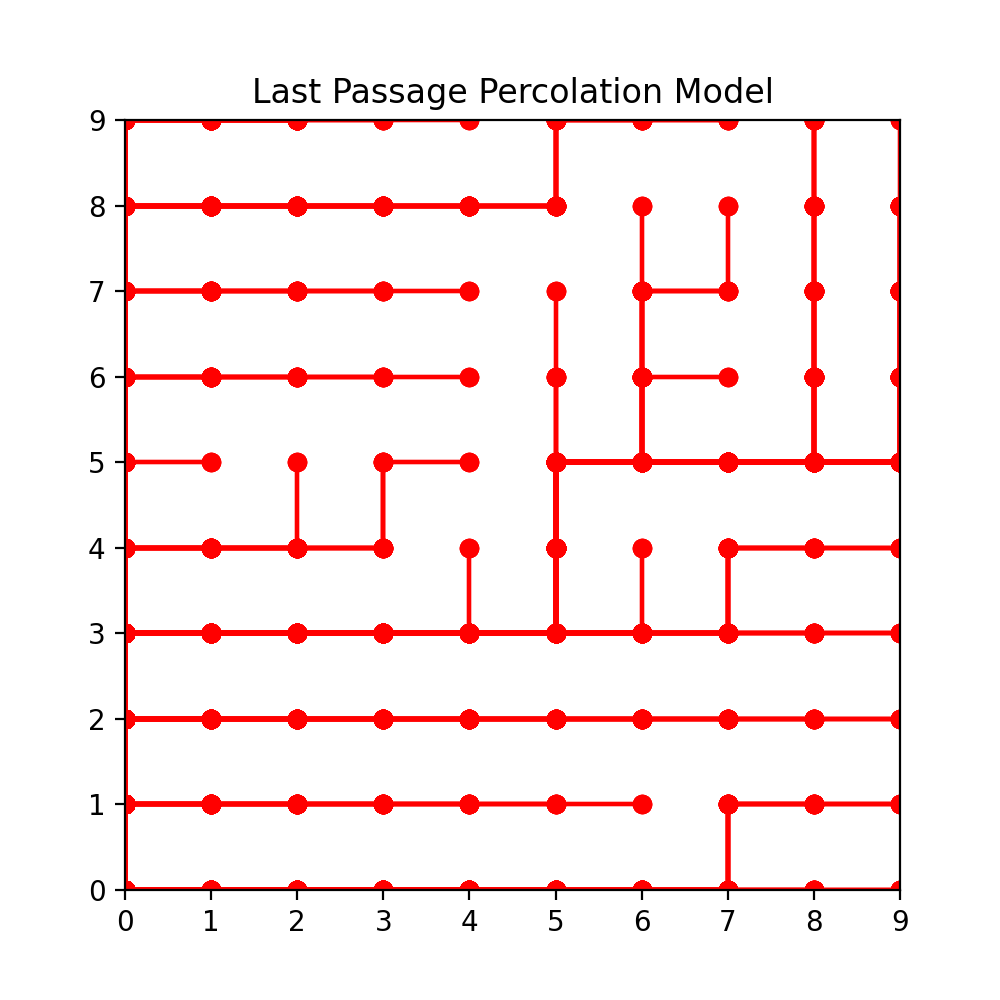

In [2]:
#
#adjust
#
n = 10
speed = 100 #delay between frames in milliseconds of visual
visual(n,speed)

Let's work through an example:

At t = 0:
G[0,0] = 0

notice how G[0,0]'s coordinates add to 0 at t = 0.

At t = 1:
G[0,1] = max(G[0,0], G[0,0]) + W[0,1] = 0 + Exp(1)
G[1,0] = max(G[0,0], G[0,0]) + W[1,0] = 0 + Exp(1)

notice how G[0,1] and G[1,0] both have coordinates add to 1 and t = 1.

At t = 2:
G[0,2] = max(G[0,1], G[-1,2]) + W[0,2] = max(G[0,1], G[-1,2]) + Exp(1)
G[1,1] = max(G[1,0], G[0,1]) + W[1,1] = max(G[1,0], G[0,1]) + Exp(1)
G[2,0] = max(G[2,-1], G[1,0]) + W[2,0] = max(G[2,-1], G[1,0]) + Exp(1)

notice how G[0,2], G[1,1], and G[2,0] all have coordinates add to 2 and t = 2.

Whichever coordinate is max is the point the line goes to in the visual above forming geodesics.

The Directed Polymer in a Random Environment (DPRE) Model is similar, but uses logaddexp instead if maximums.